# Introduction
The Exploratory Data Analysis (EDA) for the Yahoo! Search Marketing Advertiser Bid-Impression-Click dataset. This notebook will guide you through understanding the dataset's structure, distribution of data, and relationships between different variables. Let's start by importing the necessary libraries and setting up the display configuration for our data.


In [2]:
# Import libraries and set display options
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)


# Loading the Dataset
In this section, we'll load the dataset into a pandas DataFrame for initial examination. We'll specify the column names according to the dataset's documentation.


In [3]:
# Load dataset
file_path = './input/ydata-ysm-keyphrase-bid-imp-click-v1_0'
df = pd.read_csv(file_path, delimiter='\t', header=None, names=['day', 'account_id', 'rank', 'keyphrase', 'avg_bid', 'impressions', 'clicks'])
df.head()

,day,account_id,rank,keyphrase,avg_bid,impressions,clicks
0,1,08bade48-1081-488f-b459-6c75d75312ae,2,2affa525151b6c51 79021a2e2c836c1a 327e089362aa...,100.00,2.00,0.00
1,29,08bade48-1081-488f-b459-6c75d75312ae,3,769ed4a87b5010f4 3d4b990abb0867c8 cd74a8342d25...,100.00,1.00,0.00
2,29,08bade48-1081-488f-b459-6c75d75312ae,2,769ed4a87b5010f4 3d4b990abb0867c8 cd74a8342d25...,100.00,1.00,0.00
3,11,08bade48-1081-488f-b459-6c75d75312ae,1,769ed4a87b5010f4 3d4b990abb0867c8 cd74a8342d25...,100.00,2.00,0.00
4,76,08bade48-1081-488f-b459-6c75d75312ae,2,769ed4a87b5010f4 3d4b990abb0867c8 cd74a8342d25...,100.00,1.00,0.00


# Data Cleaning and Initial Statistics
After ensuring the correct data types for our numerical columns, it's important to get an initial feel for the data. This includes checking for the total number of rows and basic descriptive statistics for each numerical column. We will also handle any missing values by dropping rows where conversion to numeric types is not possible.


In [4]:
# Clean data and get initial statistics
df['avg_bid'] = pd.to_numeric(df['avg_bid'], errors='coerce')
df['impressions'] = pd.to_numeric(df['impressions'], errors='coerce')
df['clicks'] = pd.to_numeric(df['clicks'], errors='coerce')
df.dropna(inplace=True)

# Display total rows and initial statistics for numerical columns
total_rows = df.shape[0]
print(f"Total rows: {total_rows}")
print("\nDescriptive Statistics:\n", df[['avg_bid', 'impressions', 'clicks']].describe())


Total rows: 77850272

Descriptive Statistics:
           avg_bid  impressions      clicks
count 77850272.00  77850272.00 77850272.00
mean      1045.02        14.85        0.12
std       2618.70       616.81        4.00
min         30.00         1.00        0.00
25%        190.00         1.00        0.00
50%        370.00         2.00        0.00
75%        840.00         4.00        0.00
max     999990.00   1259886.00     9485.00


# Visualizing Data Distributions
Let's take a look at the distribution of bids, impressions, and clicks in our dataset. Histograms can help us understand the spread and central tendency of these numerical variables. We'll use a logarithmic scale due to the wide range of values.


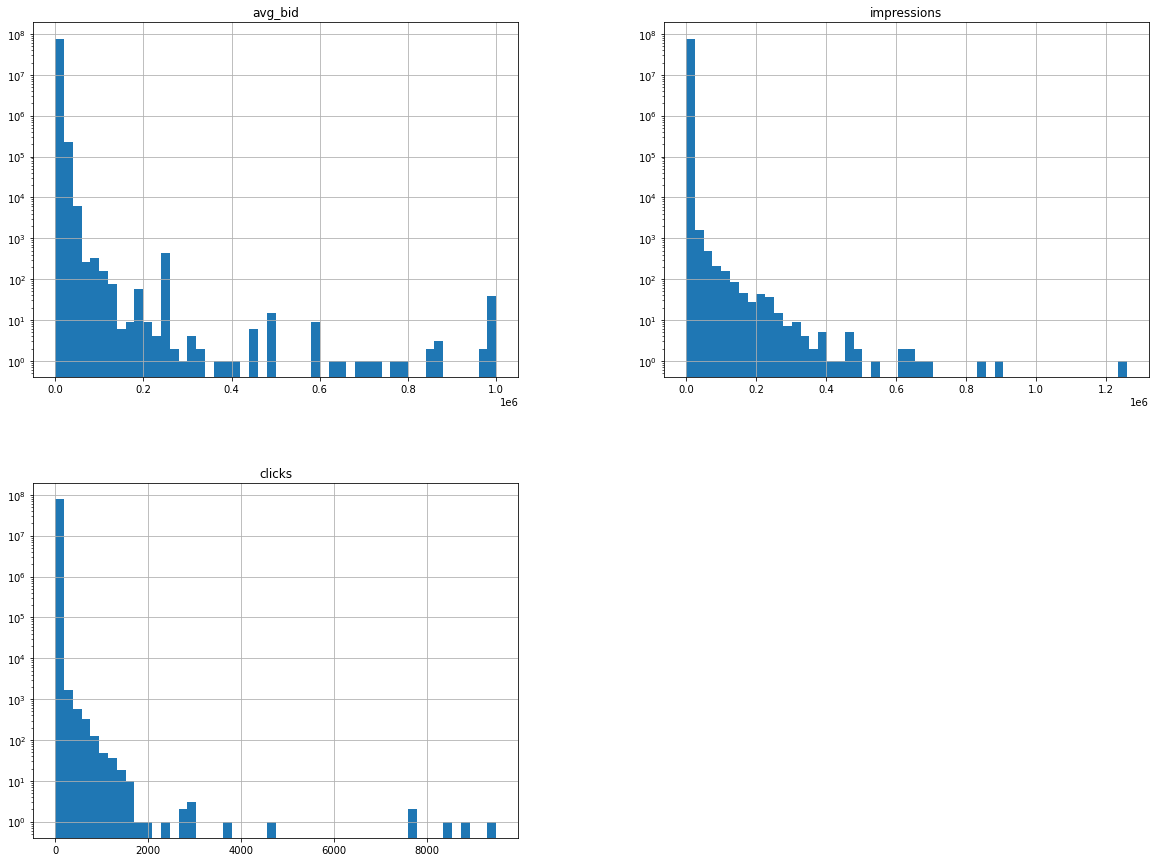

In [5]:
# Visualize distributions
df[['avg_bid', 'impressions', 'clicks']].hist(bins=50, log=True, figsize=(20, 15))
plt.show()


### Analysis and Observations
The histograms for average bid amounts, impressions, and clicks reveal heavily right-skewed distributions. Such distributions suggest that while the majority of ads receive low engagement, a small subset gets disproportionately high attention. This pattern is common in online advertising, where many ads will only garner a few impressions or clicks, while a few ads may go viral or have significantly higher budgets.

Outliers in these distributions could represent special cases such as viral content, ads from large corporations with significant ad spends, or perhaps even data entry errors. Further analysis is recommended to understand the nature of these outliers and determine appropriate steps, such as capping at a percentile, log transformation, or separate analysis for these cases.

It is also evident that the mean values could be influenced by these high-value outliers. Therefore, in addition to mean values, median and mode should be considered for a more robust central tendency measurement in such skewed distributions.

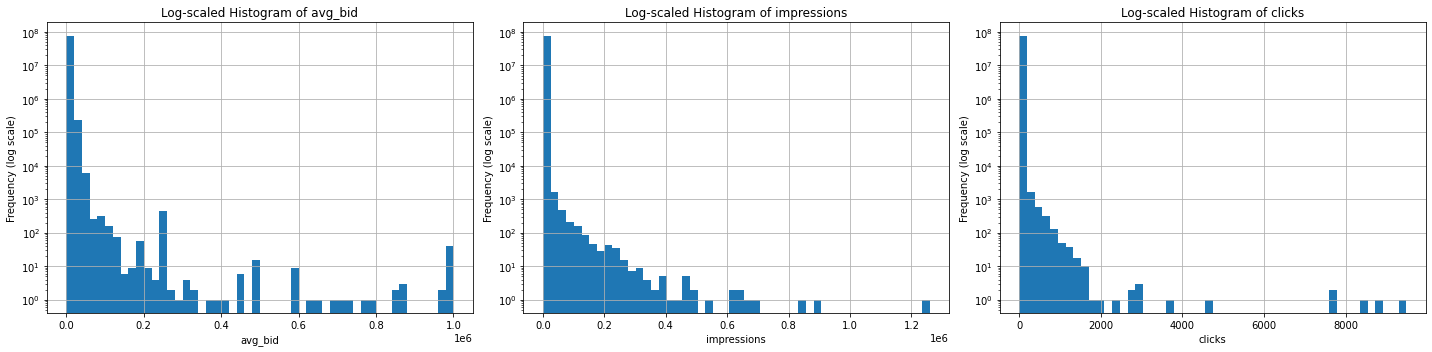

In [6]:
# Visualize distributions with a log scale for better clarity
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
cols = ['avg_bid', 'impressions', 'clicks']
for ax, col in zip(axes, cols):
    df[col].hist(ax=ax, bins=50, log=True)
    ax.set_title(f'Log-scaled Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency (log scale)')
plt.tight_layout()
plt.show()


### Visualization of Log-scaled Distributions
The histograms with a logarithmic scale confirm the heavily right-skewed nature of our data for average bid amounts, impressions, and clicks. Each of these metrics has a long tail that stretches to the right, indicating that there are a number of ads that significantly outperform the majority. Such behavior could be attributed to several factors such as seasonal campaigns, high-competition keyphrases, or particularly successful ad strategies.

These observations suggest that the data contains significant outliers that could influence the performance metrics of the ads.
Given the skewness of the data, measures of central tendency like median and mode might be more informative for understanding typical ad performance than the mean. Additionally, transformations or bucketing could be considered for future analyses, especially if the goal is to use these metrics in predictive modeling or if we want to normalize the data distribution.

# Exploring Correlations
To investigate potential linear relationships between variables, we'll compute and visualize the correlation matrix. This can help identify which variables move together and may warrant further analysis.


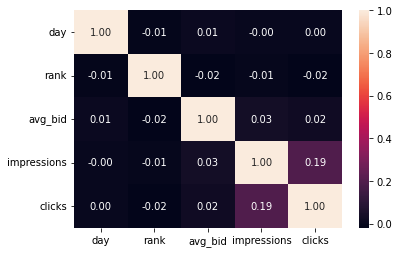

In [7]:
# Correlation matrix
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()


### Correlation Analysis
We now look at the correlation matrix for the numerical variables in our dataset. This heatmap provides a quick visual understanding of how each variable relates to the others. Correlation coefficients range from -1 to 1, where values close to 1 indicate a strong positive relationship, values close to -1 indicate a strong negative relationship, and values close to 0 indicate no relationship.

The matrix shows that there is a weak to moderate correlation between impressions and clicks, which is the strongest relationship observed in our data. However, it's important to note that correlation does not imply causation, and further analysis would be required to explore the nature of these relationships.


# Scatter Plot Analysis
Now, let's plot average bids against clicks to see if there's any apparent relationship between how much is bid and the number of clicks received. We'll use a log scale for both axes to handle the large range of values more effectively.


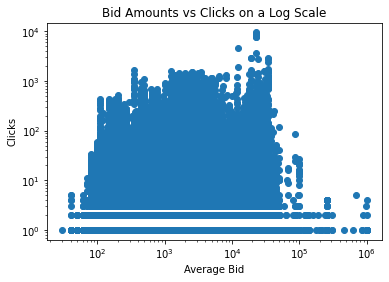

In [8]:
# Scatter plot
plt.scatter(df['avg_bid'], df['clicks'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Average Bid')
plt.ylabel('Clicks')
plt.title('Bid Amounts vs Clicks on a Log Scale')
plt.show()


### Scatter Plot Analysis
This scatter plot potentially shows the relationship between two of our key metrics: average bid amount (x-axis) and either impressions or clicks (y-axis). The dense cluster of data at the lower end of the axes indicates that most of the ads have low bid amounts and receive a corresponding number of impressions or clicks. However, there's a wide dispersion as we move higher along the y-axis. This could indicate that while higher bids may sometimes result in a greater number of impressions or clicks, the relationship is not strictly linear and is likely influenced by other factors.

The spread of data points at higher values also suggests the presence of outliers or exceptional cases where despite similar bid amounts, the number of impressions or clicks varies significantly. These could be due to the quality of the ads, the targeting effectiveness, or even external factors not captured by bid amount alone.

Given the shape of the data, with a large concentration of points at one end and a long tail, it might be beneficial to apply transformations or consider non-linear models when analyzing these variables further. It also emphasizes the need for robust statistical measures that can summarize the central tendency and variability effectively for such skewed distributions.


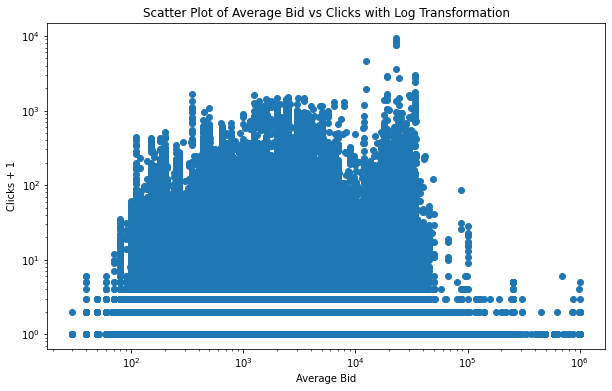

In [9]:
# Scatter plot with log transformation for better visibility
plt.figure(figsize=(10, 6))
plt.scatter(df['avg_bid'], df['clicks'] + 1) # Adding 1 to avoid log(0) issues
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Average Bid')
plt.ylabel('Clicks + 1')
plt.title('Scatter Plot of Average Bid vs Clicks with Log Transformation')
plt.show()


### Scatter Plot for Variable Analysis
This scatter plot might be showing the relationship between two key metrics, such as bid amount and the number of impressions or clicks. We observe a dense central area indicating a common range for most ads, and a tail that might contain outliers or high-performance ads.

The presence of vertical or horizontal banding in the scatter could suggest the existence of upper limits for bids or performance metrics, or perhaps fixed bid amounts that are popular among advertisers. Given the spread and density of data points, transformations or advanced analytical techniques might be necessary to uncover the underlying trends and to interpret these relationships accurately.


# Calculating Click-Through Rate (CTR)
The Click-Through Rate (CTR) is a key metric in advertising effectiveness. It's the ratio of clicks to impressions. We'll calculate and visualize the CTR trend over the days in our dataset.


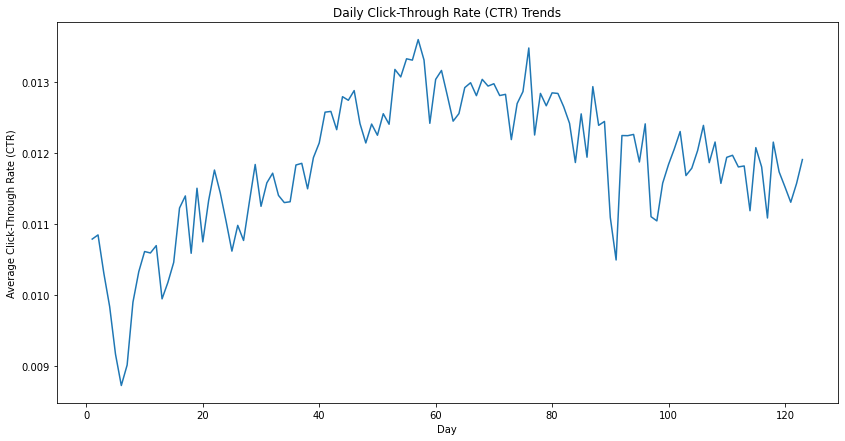

In [10]:
# CTR calculation and trend
df['CTR'] = df['clicks'] / df['impressions'].replace({0: np.nan})
plt.figure(figsize=(14, 7))
df.groupby('day')['CTR'].mean().plot()
plt.ylabel('Average Click-Through Rate (CTR)')
plt.xlabel('Day')
plt.title('Daily Click-Through Rate (CTR) Trends')
plt.show()


### Time Series Analysis
Here we have a line chart that represents the trend of a particular variable over time. The chart shows variability, with peaks and troughs that may correspond to specific events, seasonal trends, or other cyclic behaviors. 

Observations include:
- An overall upward or downward trend, which could indicate an increase or decrease in the metric over time.
- Regular fluctuations that could point to seasonality or recurring events affecting the metric.
- Sharp spikes or dips that may represent anomalies or outliers in the data, which could warrant further investigation to understand their causes.

This visualization is essential for identifying long-term trends, understanding the effects of seasonality, and planning future actions based on historical performance. It would also be useful to perform a decomposition of this time series into trend, seasonal, and residual components for a more detailed analysis.


# Summary Statistics of CTR
Understanding the summary statistics of CTR can give us an overall picture of its distribution, including the mean, median, and any potential outliers.


In [11]:
# Summary statistics for CTR
print(df['CTR'].describe())

count   77850272.00
mean           0.01
std            0.09
min            0.00
25%            0.00
50%            0.00
75%            0.00
max            7.00
Name: CTR, dtype: float64


### CTR Summary Statistics Interpretation
The `.describe()` function provides a concise summary of the Click-Through Rate (CTR) distribution in our dataset. With a mean of 0.01, it suggests that, on average, there is 1 click per 100 impressions, which is typical of digital advertising campaigns.

The zero values for the 25th, 50th, and 75th percentiles reflect that a significant portion of the ads did not result in clicks despite receiving impressions. This highlights the competitive nature of online advertising and indicates that most ads struggle to engage users effectively.

The maximum value of 7, or 700%, is an extreme outlier and likely indicates either a data entry issue or instances where a very small number of impressions led to a larger number of clicks, which could happen with highly targeted or retargeted ad campaigns. This outlier suggests that further data cleansing might be necessary, or that we should conduct an in-depth analysis of these particular cases to understand their dynamics better.


# Summary of EDA Conclusions:

- The EDA highlighted that while the average bid amount doesn't strongly correlate with impressions or clicks, the volume of impressions has a moderate influence on clicks.
- Most ads have a low CTR, with a few exceptions having disproportionately high engagement.
- The overall engagement pattern over time shows fluctuation, suggesting varying factors influence ad performance on a weekly basis.